# World Happiness Report Analysis
Vinod Ragoonauth - 219213420

## Question 3: How much does the dystopia residual impact a country's happiness score?

In [7]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
# 2015
file_path1 = "2015.csv"
df1 = pd.read_csv(file_path1)

# 2016
file_path2 = "2016.csv"
df2 = pd.read_csv(file_path2)

# 2017
file_path3 = "2017.csv"
df3 = pd.read_csv(file_path3)
# Fix attribute names
df3 = df3.rename(columns={
    'Dystopia.Residual': 'Dystopia Residual',
    'Happiness.Rank': 'Happiness Rank',
    "Happiness.Score": "Happiness Score"})

### **Part 1:** Determine the top 5 countries based on dystopia residual impact

In [9]:
# Find the percentage that Dystopian Residual impacts Happiness Score
def dystopia_impact(df, year):     
    df['Percentage Impact'] = (df['Dystopia Residual'] / df['Happiness Score']) * 100
    dr_sorted = df.sort_values(by='Percentage Impact', ascending=False)
    print("     Dystopia Residual impact - " + year)
    print(dr_sorted[['Country','Happiness Rank', 'Happiness Score','Dystopia Residual', 'Percentage Impact']])

# Fix output formatting
pd.set_option('expand_frame_repr', False)

# Print top 5 countries with largest percentages for each year
dystopia_impact(df1, "2015")
dystopia_impact(df2, "2016")
dystopia_impact(df3, "2017")

     Dystopia Residual impact - 2015
                      Country  Happiness Rank  Happiness Score  Dystopia Residual  Percentage Impact
147  Central African Republic             148            3.678            2.72230          74.015769
130                    Malawi             131            4.292            2.80791          65.421948
119          Congo (Kinshasa)             120            4.517            2.86712          63.473987
156                   Burundi             157            2.905            1.83302          63.098795
93                 Mozambique              94            4.971            3.05137          61.383424
..                        ...             ...              ...                ...                ...
133                  Bulgaria             134            4.218            0.89991          21.334993
153                    Rwanda             154            3.465            0.67042          19.348341
131                 Sri Lanka             132         

### **Part 2:** Determining optimal # of clusters  

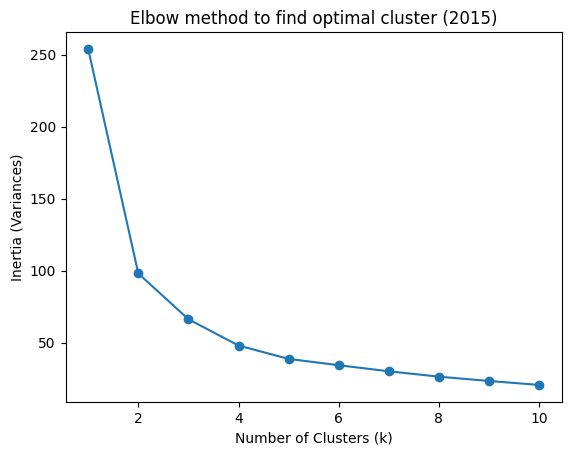

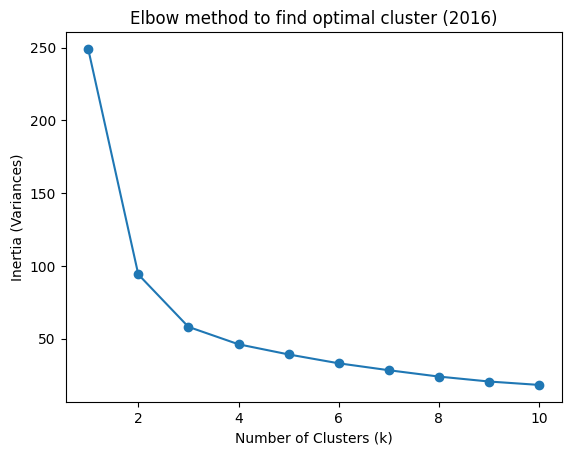

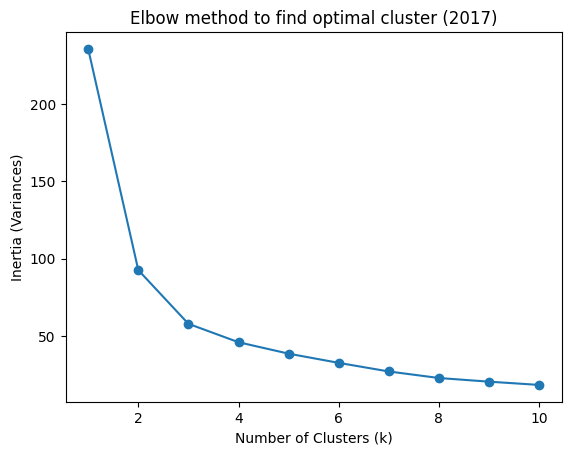

In [10]:
# Determine the optimal number of clusters using the elbow method
def find_optimal_cluster(df, year):
    x = df[['Dystopia Residual', "Happiness Score"]]
    inertias = []

    # Calculate distance from centroid for 0 - 10 clusters
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(x)
        # Add to list of k values
        inertias.append(kmeans.inertia_)

    # Plot chart
    plt.plot(range(1, 11), inertias, marker='o')
    plt.title('Elbow method to find optimal cluster (' + year + ')')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Variances)')
    plt.show()

# Plot k values for each year
find_optimal_cluster(df1, "2015")
find_optimal_cluster(df2, "2016")
find_optimal_cluster(df3, "2017")

### **Part 3:** Cluster Analysis (Happiness Score and Dystopia Residual)

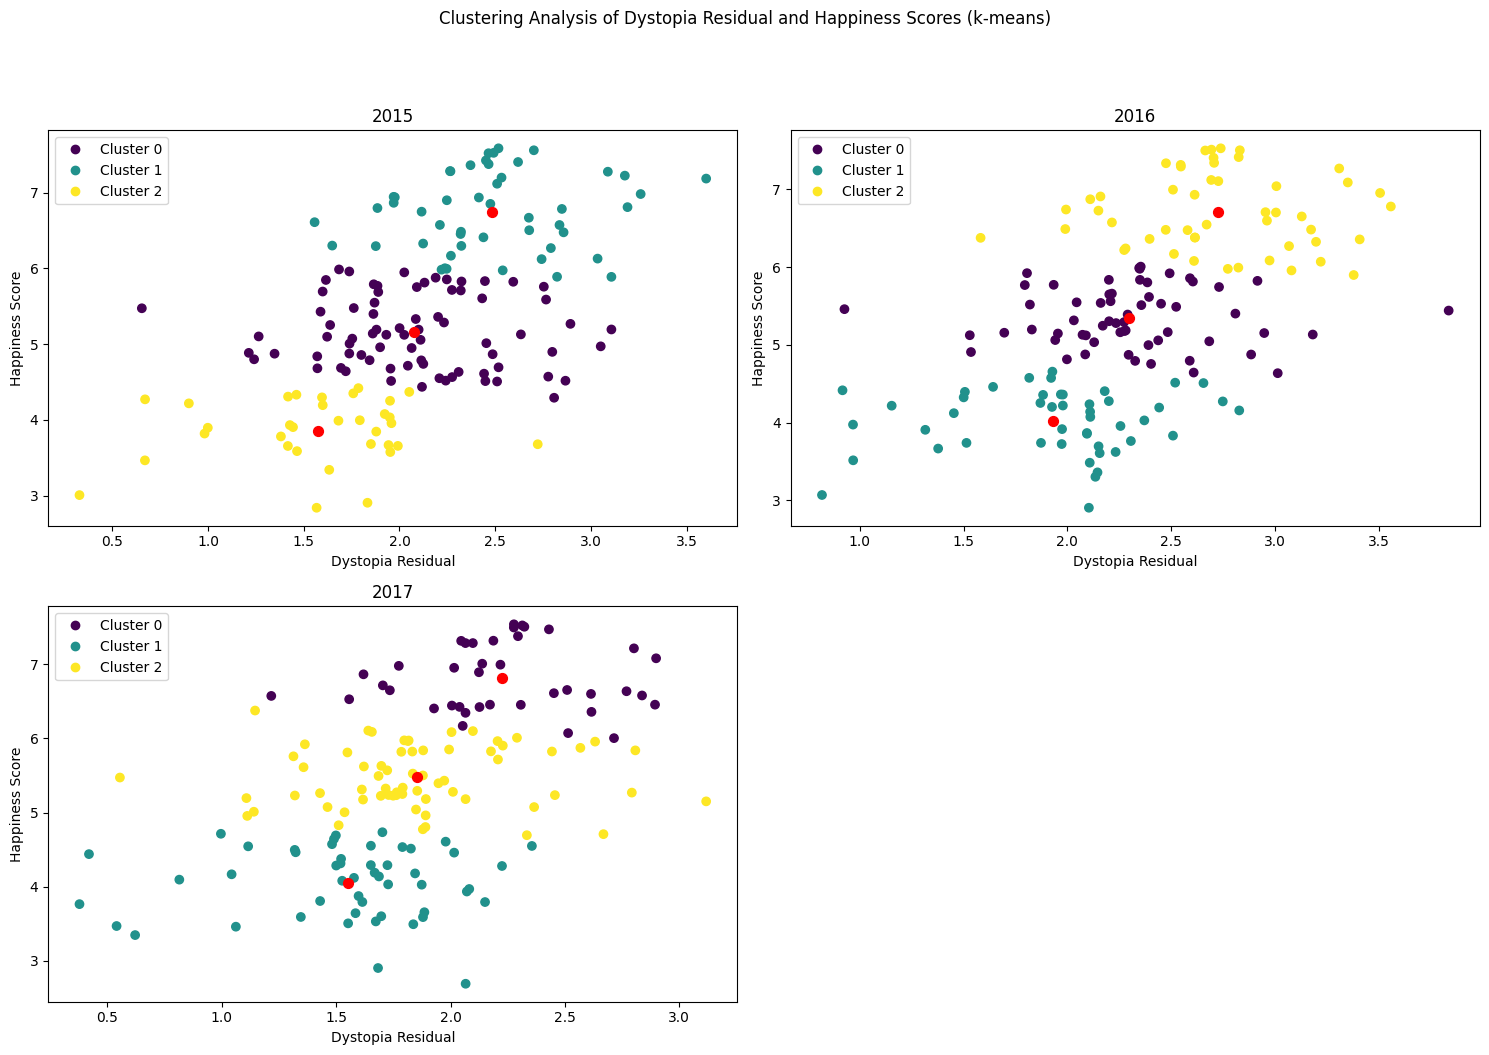

In [11]:
# Cluster analysis for Happiness Score and Dystopia Residual for k = 3
def cluster_analysis(axis, df, title):
    x = df[['Dystopia Residual', 'Happiness Score']]

    # Optimal number of clusters
    k = 3

    # k-means clustering algorithim
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    df['Cluster'] = kmeans.fit_predict(x)

    # Visualize analysis on a scatterplot
    cluster_plot = axis.scatter(x['Dystopia Residual'], x['Happiness Score'], c=df['Cluster'])
    # Add centroids to graph
    axis.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='.', s=200)

    # Label cluster colors
    cluster_label = [f'Cluster {i}' for i in range(k)]
    axis.legend(handles=cluster_plot.legend_elements()[0], labels=cluster_label)

    # Setup plot
    axis.set_title(title)
    axis.set_xlabel('Dystopia Residual')
    axis.set_ylabel('Happiness Score')
    cluster_info = df.groupby('Cluster')[['Dystopia Residual', 'Happiness Score']].describe()

    return cluster_info

# Create a 2x2 grid of subplots
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
# Remove empty plot
fig.delaxes(axis[1, 1])

# Cluster analysis on each year
c1 = cluster_analysis(axis[0, 0], df1, "2015")
c2 = cluster_analysis(axis[0, 1], df2, "2016")
c3 = cluster_analysis(axis[1, 0], df3, "2017")

fig.suptitle('Clustering Analysis of Dystopia Residual and Happiness Scores (k-means)', y=1.05)
# Prevent overlapping graphs
plt.tight_layout()
plt.show()

### **Part 3.1:** Print Number of Countries per Cluster

In [12]:
# Print # of countries per cluster
def country_count(cluster, year):
    print(f"# Of Countries in {year}")

    # Counts # of rows and prints countries per cluster
    for cluster_number, i in cluster.iterrows():
        countries = i['Happiness Score']['count']
        print(f"Cluster {cluster_number} = {countries}")
    print("\n")

# Count countries per cluster for each year
country_count(c1, "2015")
country_count(c2, "2016")
country_count(c3, "2017")

# Of Countries in 2015
Cluster 0 = 76.0
Cluster 1 = 49.0
Cluster 2 = 33.0


# Of Countries in 2016
Cluster 0 = 60.0
Cluster 1 = 47.0
Cluster 2 = 50.0


# Of Countries in 2017
Cluster 0 = 39.0
Cluster 1 = 50.0
Cluster 2 = 66.0


